# <center>Kaggle's [Loan](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set) Dataset</center>
#### <center>by Hector Cadeaux</center>

### <center>Data Dictionary</center>
Gender: Female/Male/Nan<br>
Married: Yes/No<br>
Dependents: 0, 1, 2, 3+ (to be recoded)<br>
Education: Graduate/Not Graduate<br>
Self_Employed: Whether an applicant is self-employeed<br>
Applicant_Income: Amount of applicant income<br>
Coapplicant_Income: Amount of co-applicant income<br>
Loan_Amount: Amount of loan<br>
Term: Length of the loan<br>
Credit_History: Whether the applicant has a history of paying back a loan<br>
Area: Urban, Semiurban and Rural<br>
<br>
<br>
#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
loans= pd.read_csv('loan_train.csv')
loans

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


In [4]:
loans.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [5]:
loans.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Area', 'Status'],
      dtype='object')

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [7]:
val_cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Term',
       'Credit_History', 'Area', 'Status']

In [8]:
for col in val_cols:
    print(loans[col].value_counts())
    print("{} empty cells".format(loans[col].isna().sum()))

Gender
Male      489
Female    112
Name: count, dtype: int64
13 empty cells
Married
Yes    398
No     213
Name: count, dtype: int64
3 empty cells
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
15 empty cells
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
0 empty cells
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
32 empty cells
Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
14 empty cells
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
50 empty cells
Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
0 empty cells
Status
Y    422
N    192
Name: count, dtype: int64
0 empty cells


In [9]:
for col in loans.loc[:,~(loans.columns.isin(val_cols))].columns:
    print("{} has {} empty cells".format(col,loans[col].isna().sum()))

Applicant_Income has 0 empty cells
Coapplicant_Income has 0 empty cells
Loan_Amount has 0 empty cells


<Axes: >

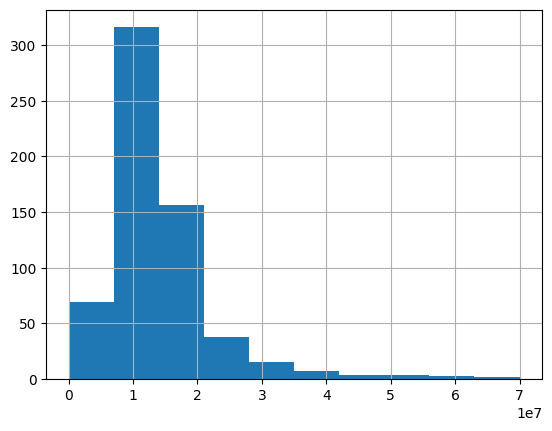

In [10]:
loans["Loan_Amount"].hist()

<Axes: >

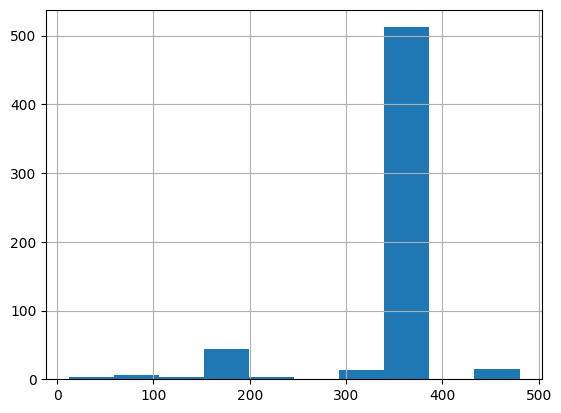

In [11]:
loans["Term"].hist()

<Axes: xlabel='Gender', ylabel='Loan_Amount'>

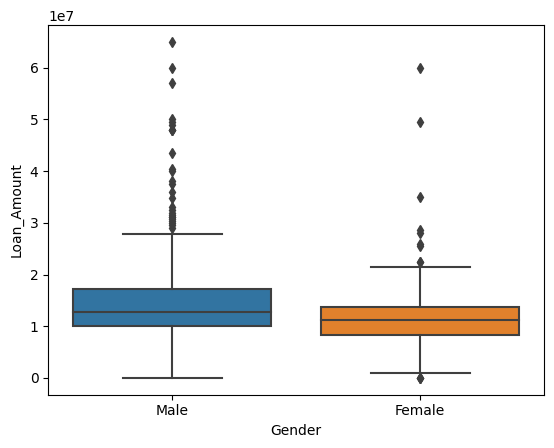

In [12]:
sns.boxplot(data=loans,y="Loan_Amount", x="Gender")

<Axes: xlabel='Gender', ylabel='Applicant_Income'>

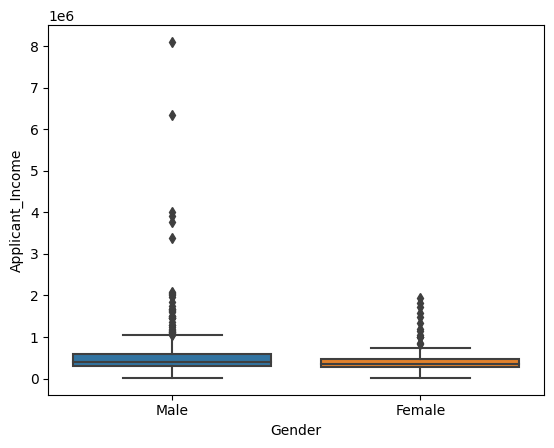

In [13]:
sns.boxplot(data=loans,y="Applicant_Income", x="Gender")

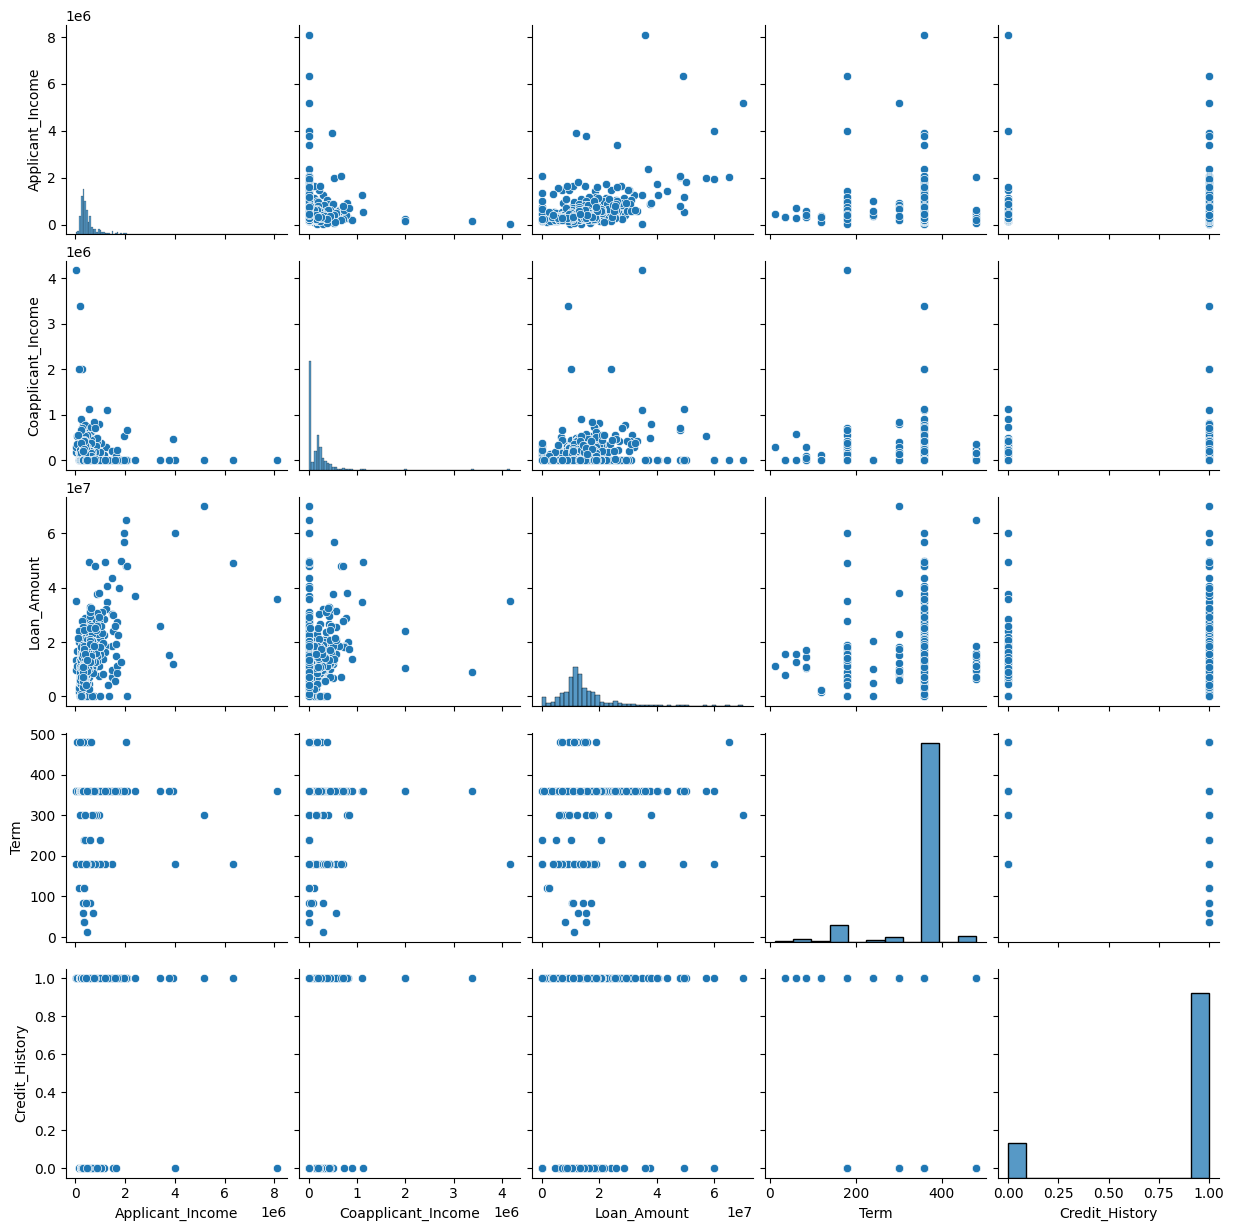

In [14]:
sns.pairplot(loans)

In [15]:
loans[loans["Gender"].isna()]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
23,NaN,Yes,2,Not Graduate,No,336500,191700.0,11200000,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,2380300,0.0,37000000,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,5176300,0.0,70000000,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,67400,529600.0,16800000,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,247300,184300.0,15900000,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,983300,183300.0,18200000,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,208300,408300.0,16000000,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,1669200,0.0,11000000,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,287300,187200.0,13200000,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,358300,0.0,9600000,360.0,1.0,Urban,N


In [16]:
loans[loans["Married"].isna()]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
104,Male,NaN,NaN,Graduate,No,381600,75400.0,16000000,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,475800,0.0,15800000,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,1004700,0.0,0,240.0,1.0,Semiurban,Y


In [17]:
loans[loans["Dependents"].isna()]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
102,Male,Yes,NaN,Graduate,No,1365000,0.0,0,360.0,1.0,Urban,Y
104,Male,NaN,NaN,Graduate,No,381600,75400.0,16000000,360.0,1.0,Urban,Y
120,Male,Yes,NaN,Graduate,No,566700,266700.0,18000000,360.0,1.0,Rural,Y
226,Male,Yes,NaN,Not Graduate,Yes,473500,0.0,13800000,360.0,1.0,Urban,N
228,Male,NaN,NaN,Graduate,No,475800,0.0,15800000,480.0,1.0,Semiurban,Y
293,Female,No,NaN,Graduate,No,541700,0.0,14300000,480.0,0.0,Urban,N
301,Male,Yes,NaN,Not Graduate,No,287500,175000.0,10500000,360.0,1.0,Semiurban,Y
332,Male,No,NaN,Graduate,No,283300,0.0,7100000,360.0,1.0,Urban,Y
335,Male,Yes,NaN,Graduate,Yes,550300,449000.0,7000000,NaN,1.0,Semiurban,Y
346,Male,Yes,NaN,Not Graduate,No,352300,323000.0,15200000,360.0,0.0,Rural,N


In [18]:
loans[["Gender","Education"]].value_counts()

Gender  Education   
Male    Graduate        376
        Not Graduate    113
Female  Graduate         92
        Not Graduate     20
Name: count, dtype: int64

In [19]:
loans["Status"]= loans["Status"].replace(["Y","N"],[1,0])
loans['Status'].astype(str)
loans

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,1


In [20]:
recode_dict={"Gender":{'Male':"1", 'Female':"0", np.nan:"0"},
                "Married":{'Yes':"1",'No':"0",np.nan:"0"},
				"Dependents":{"3+":"4",np.nan:"2" },#average number of children per family is 2
                "Education":{"Graduate":"1", "Not Graduate":"0"},
				"Self_Employed":{"Yes":"1","No": "0",np.nan:"1"},
				"Term":{np.nan:360},
				"Credit_History":{np.nan:"0"}
                }

#### <center>Recoding and NaNs</center><br>
The preceding was the dictionary I used to recode the dataframe and fill its NaN values. For gender I recoded the males to "1" and females to 0. I used a coin flip to determine the status of the genders. The number of female applicants seemed low, so I recoded the NaNs to female

In [21]:
for key in recode_dict.keys():
    for llave, values in recode_dict[key].items():
        loans[key] = loans[key].replace(llave,values)

In [22]:
loans

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,1,0,584900,0.0,15000000,360.0,1.0,Urban,1
1,1,1,1,1,0,458300,150800.0,12800000,360.0,1.0,Rural,0
2,1,1,0,1,1,300000,0.0,6600000,360.0,1.0,Urban,1
3,1,1,0,0,0,258300,235800.0,12000000,360.0,1.0,Urban,1
4,1,0,0,1,0,600000,0.0,14100000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,290000,0.0,7100000,360.0,1.0,Rural,1
610,1,1,4,1,0,410600,0.0,4000000,180.0,1.0,Rural,1
611,1,1,1,1,0,807200,24000.0,25300000,360.0,1.0,Urban,1
612,1,1,2,1,0,758300,0.0,18700000,360.0,1.0,Urban,1


In [23]:
loans.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [24]:
loan_t = pd.read_csv('loan_test.csv')
loan_t

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,400900,177700,11300000,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,415800,70900,11500000,360.0,1.0,Urban
364,Male,No,0,Graduate,No,325000,199300,12600000,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,500000,239300,15800000,360.0,1.0,Rural


In [25]:
loan_t.isna().sum()

Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   6
Credit_History        29
Area                   0
dtype: int64

In [26]:
for key in recode_dict.keys():
    for llave, values in recode_dict[key].items():
        loan_t[key] = loan_t[key].replace(llave,values)

In [27]:
loan_t.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term
count,3.670000e+02,3.670000e+02,3.670000e+02,367.000000
mean,4.805599e+05,1.569578e+05,1.342779e+07,342.822888
std,4.910685e+05,2.334232e+05,6.296143e+06,64.658402
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000
25%,2.864000e+05,0.000000e+00,1.000000e+07,360.000000
50%,3.786000e+05,1.025000e+05,1.250000e+07,360.000000
75%,5.060000e+05,2.430500e+05,1.575000e+07,360.000000
max,7.252900e+06,2.400000e+06,5.500000e+07,480.000000


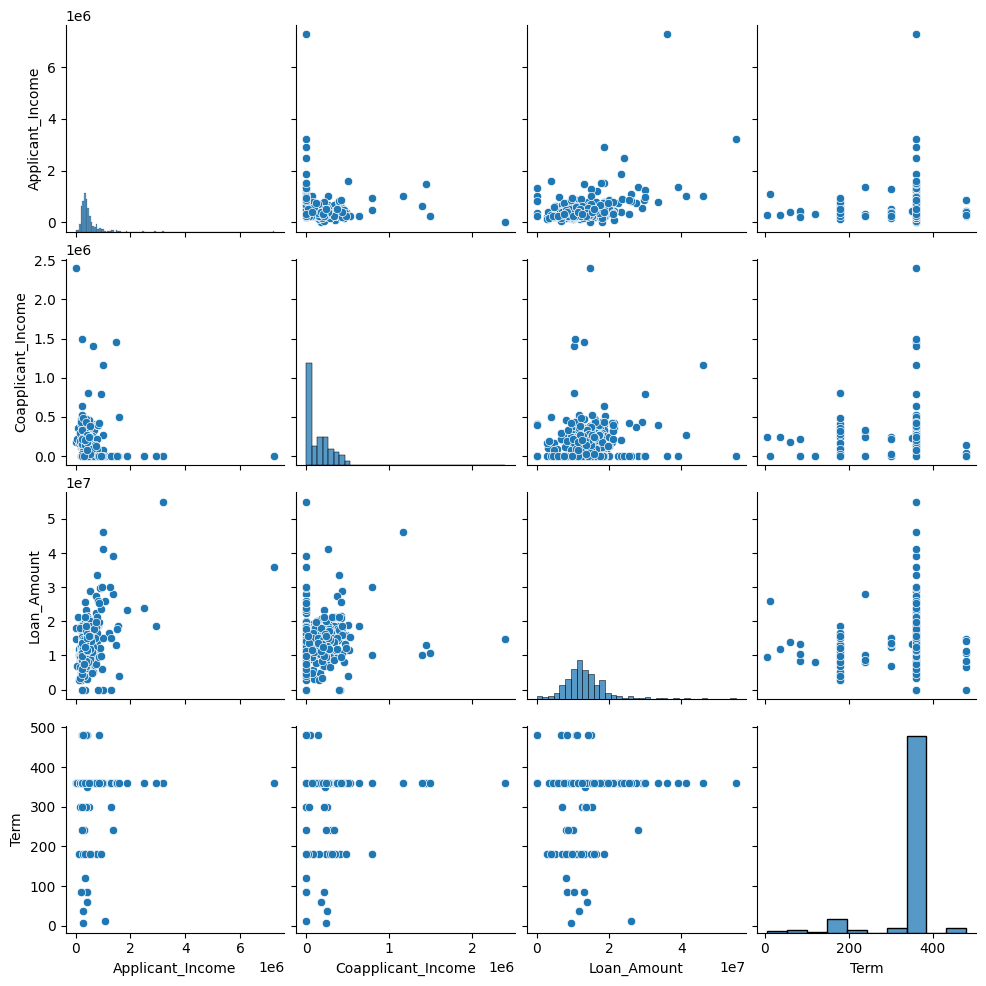

In [28]:
sns.pairplot(loan_t)
plt.show()

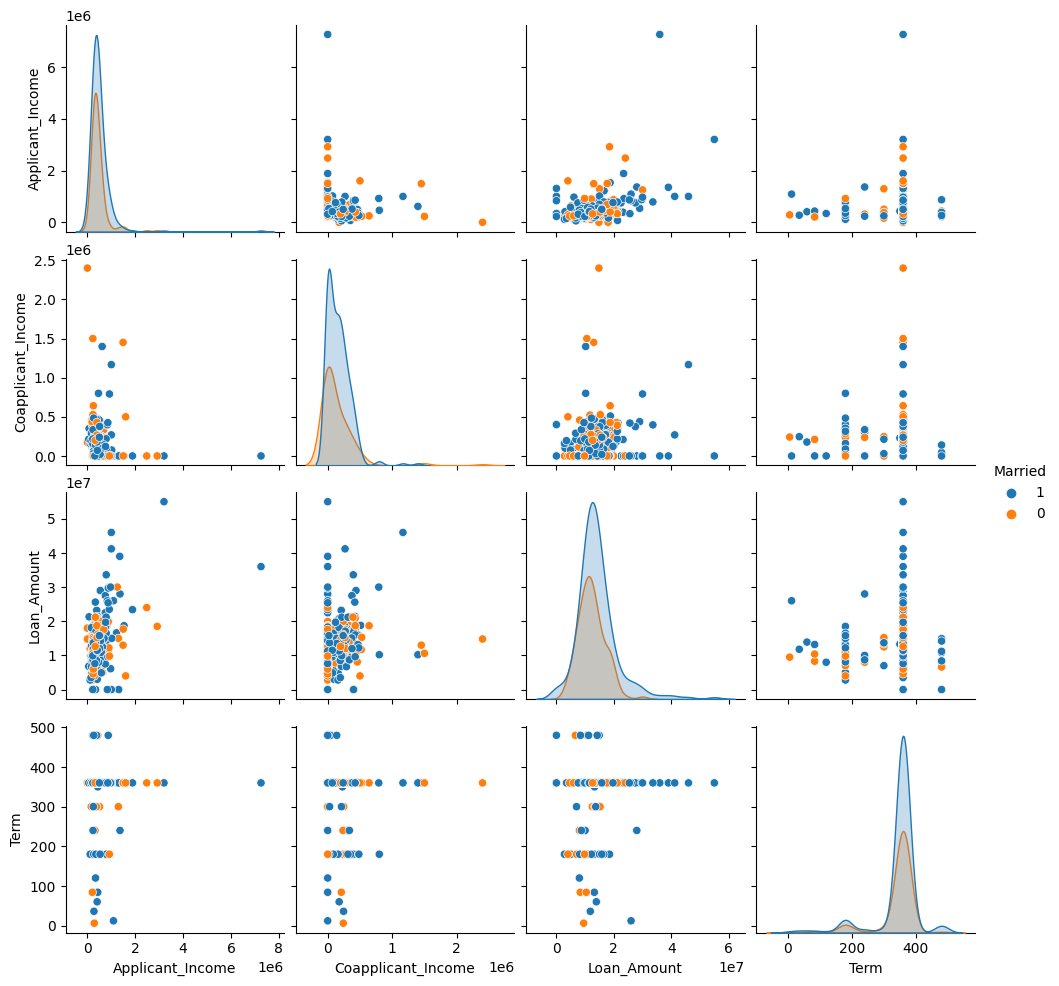

In [29]:
sns.pairplot(loan_t, hue="Married")
plt.show()

In [30]:
loans_C= loans.copy(deep=True)

In [31]:

loan_t = pd.get_dummies(loan_t, columns=["Area"], prefix="Area", prefix_sep="_", drop_first=True)
loans = pd.get_dummies(loans, columns=["Area"], prefix="Area", prefix_sep="_", drop_first=True)


In [32]:
clms= ["Gender","Married", "Dependents", "Education","Self_Employed","Area_Semiurban","Area_Urban"]
for col in clms:
    loans[col].astype(int)
    loan_t[col].astype(int)

<Axes: >

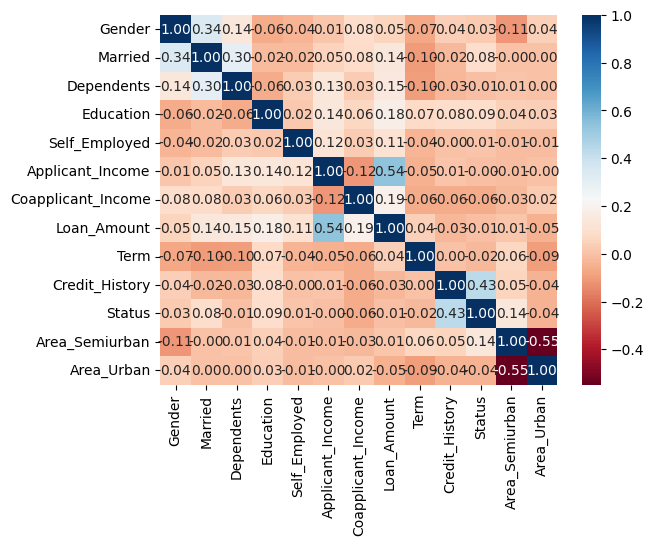

In [33]:

sns.heatmap(loans.corr(),annot=True, fmt='.2f',cmap="RdBu")

In [34]:
loans

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Status,Area_Semiurban,Area_Urban
0,1,0,0,1,0,584900,0.0,15000000,360.0,1.0,1,False,True
1,1,1,1,1,0,458300,150800.0,12800000,360.0,1.0,0,False,False
2,1,1,0,1,1,300000,0.0,6600000,360.0,1.0,1,False,True
3,1,1,0,0,0,258300,235800.0,12000000,360.0,1.0,1,False,True
4,1,0,0,1,0,600000,0.0,14100000,360.0,1.0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,290000,0.0,7100000,360.0,1.0,1,False,False
610,1,1,4,1,0,410600,0.0,4000000,180.0,1.0,1,False,False
611,1,1,1,1,0,807200,24000.0,25300000,360.0,1.0,1,False,True
612,1,1,2,1,0,758300,0.0,18700000,360.0,1.0,1,False,True


In [35]:
loan_t

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area_Semiurban,Area_Urban
0,1,1,0,1,0,572000,0,11000000,360.0,1.0,False,True
1,1,1,1,1,0,307600,150000,12600000,360.0,1.0,False,True
2,1,1,2,1,0,500000,180000,20800000,360.0,1.0,False,True
3,1,1,2,1,0,234000,254600,10000000,360.0,0,False,True
4,1,0,0,0,0,327600,0,7800000,360.0,1.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,4,0,1,400900,177700,11300000,360.0,1.0,False,True
363,1,1,0,1,0,415800,70900,11500000,360.0,1.0,False,True
364,1,0,0,1,0,325000,199300,12600000,360.0,0,True,False
365,1,1,0,1,0,500000,239300,15800000,360.0,1.0,False,False


## Linear Regression

In [36]:
#%pip install sklearn

In [37]:
#preparing the dataset with a split into training and validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
y= loans["Status"]
X=loans.loc[:,~loans.columns.isin(["Status"])]
trainX, validX, train_y, validy = train_test_split(X,y, test_size=.3,random_state=42)



In [38]:

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(trainX, train_y)
coeff_df = pd.DataFrame(model.coef_,trainX.columns,columns=['Coefficient'])


In [39]:
print(model.intercept_)
coeff_df

0.19990350715218952


,Coefficient
Gender,-3.397382e-02
Married,1.093182e-01
Dependents,4.784931e-03
Education,2.419815e-02
Self_Employed,9.678598e-03
Applicant_Income,-4.476022e-08
Coapplicant_Income,-3.793363e-08
Loan_Amount,2.452339e-09
Term,1.143404e-04
Credit_History,4.337460e-01


In [40]:
test_X=loan_t.copy(deep=True)
y_pred = model.predict(test_X)

In [41]:
from sklearn.metrics import mean_squared_error
valid_X_lin= validX.copy(deep=True)
vy_pred= model.predict(valid_X_lin)
valid_X_lin["Status"], valid_X_lin['Linear_y']= validy,vy_pred
rmse = np.sqrt(mean_squared_error(validy,vy_pred))
print("RMSE: {}".format(rmse))


RMSE: 0.4242813016403715


In [42]:
loan_tc_lin= loan_t.copy(deep=True)
loan_tc_lin['Status'] = y_pred

(273, 13)


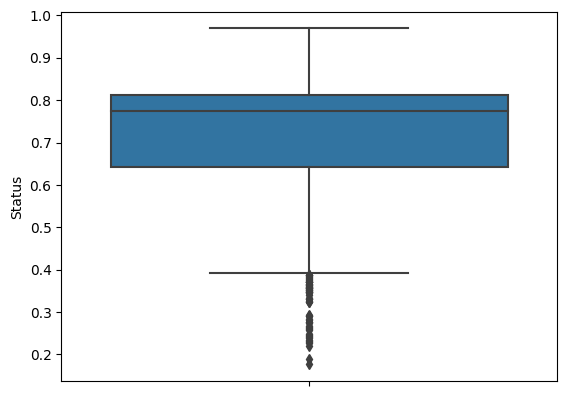

In [43]:
sns.boxplot(data=loan_tc_lin, y="Status")
print(loan_tc_lin[loan_tc_lin["Status"] > .65].shape)
plt.show()

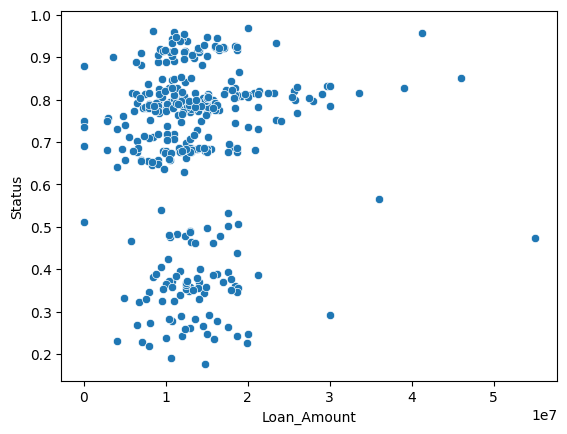

In [44]:
sns.scatterplot(data=loan_tc_lin,x="Loan_Amount", y ='Status')
plt.show()

<Axes: xlabel='Status', ylabel='Linear_y'>

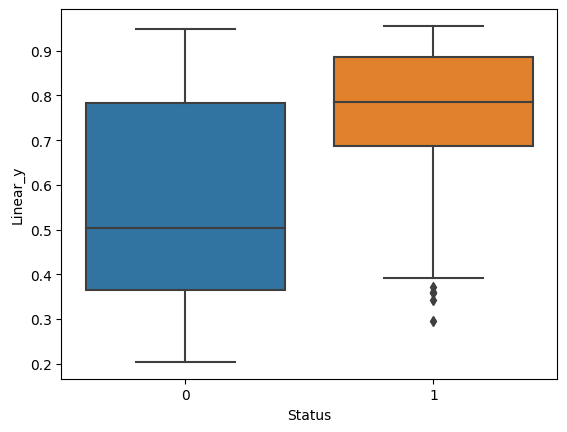

In [45]:
sns.boxplot(data=valid_X_lin, x= "Status", y="Linear_y")

In [46]:
loan_tc_lin.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Status
count,3.670000e+02,3.670000e+02,3.670000e+02,367.000000,367.000000
mean,4.805599e+05,1.569578e+05,1.342779e+07,342.822888,0.687540
std,4.910685e+05,2.334232e+05,6.296143e+06,64.658402,0.201968
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,0.176544
25%,2.864000e+05,0.000000e+00,1.000000e+07,360.000000,0.643290
50%,3.786000e+05,1.025000e+05,1.250000e+07,360.000000,0.774733
75%,5.060000e+05,2.430500e+05,1.575000e+07,360.000000,0.812059
max,7.252900e+06,2.400000e+06,5.500000e+07,480.000000,0.969455


A linear regression is not an appropriate model for classification. It does give a general idea for running a Logistic Regression. Acccording to the linear regression, credit history plays a large role in determining the Status.The marital status and living in a "semiurban" area are the next largest. Loan amounts and applicant and co-applicant income influence the loan status by a much smaller margin.<br>
## Logistic Regression

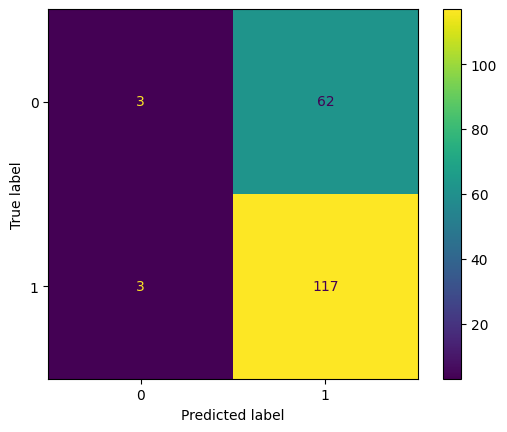

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
log_mod= LogisticRegression()
log_mod.fit(trainX, train_y)
valid_pred = log_mod.predict(validX)
cm_log= confusion_matrix(validy,valid_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_mod.classes_).plot()
plt.show()

In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
print("Accuracy:",accuracy_score(validy, valid_pred))
print("precision score: ", precision_score(validy,valid_pred))
print("recall score: ", recall_score(validy,valid_pred))
print("f1-score: ", f1_score(validy,valid_pred))

Accuracy: 0.6486486486486487
precision score:  0.6536312849162011
recall score:  0.975
f1-score:  0.782608695652174


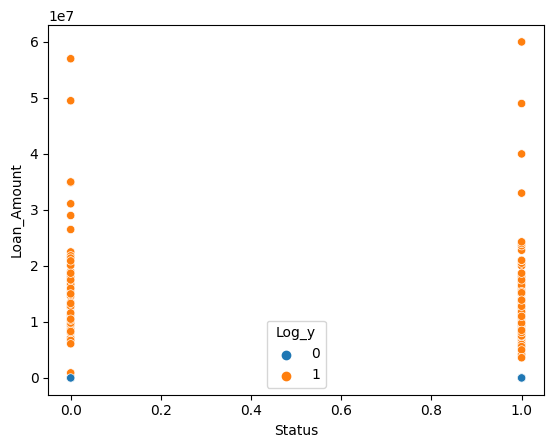

In [49]:
log_valid= validX.copy(deep=True)
log_valid["Status"], log_valid['Log_y'] = validy, valid_pred
sns.scatterplot(data= log_valid, x="Status", y = 'Loan_Amount', hue='Log_y')
plt.show()

In [50]:
#%pip install scikit-plot

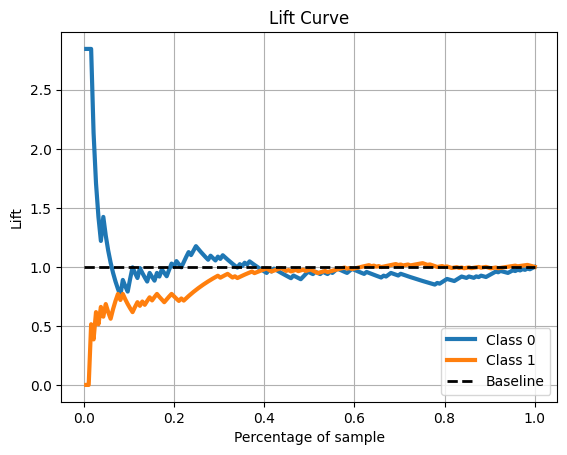

In [51]:
import scikitplot as skplt
y_probas = log_mod.predict_proba(validX) 
skplt.metrics.plot_lift_curve(validy, y_probas) 
plt.show()

In [52]:
loan_T_log = loan_t.copy(deep=True)
loan_T_log["Status"] = log_mod.predict(test_X)
print(loan_T_log["Status"].value_counts())
loan_T_log[loan_T_log["Status"]==0]

Status
1    362
0      5
Name: count, dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area_Semiurban,Area_Urban,Status
78,1,1,1,1,0,341300,405300,0,360.0,1.0,True,False,0
101,0,1,0,1,0,226200,0,0,480.0,0.0,True,False,0
188,1,1,0,0,0,1308300,0,0,360.0,1.0,False,False,0
247,1,1,2,1,0,1000000,0,0,360.0,1.0,False,True,0
289,1,1,1,1,0,833300,400000,0,360.0,1.0,False,True,0


## <center>Decision Trees</center>


In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth =4, random_state= 1)
dt.fit(trainX,train_y)

DecisionTreeClassifier(max_depth=4, random_state=1)

Accuracy: 0.772972972972973
precision score:  0.782608695652174
recall score:  0.9
f1-score:  0.8372093023255814


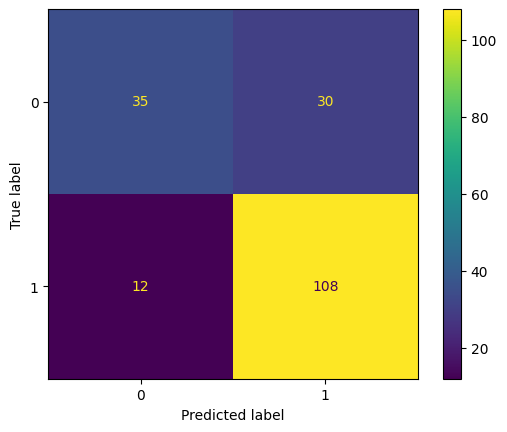

In [54]:
pred_dt= dt.predict(validX)
print("Accuracy:",accuracy_score(validy, pred_dt))
print("precision score: ", precision_score(validy,pred_dt))
print("recall score: ", recall_score(validy,pred_dt))
print("f1-score: ", f1_score(validy,pred_dt))
cm_dt= confusion_matrix(validy,pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt.classes_).plot()
plt.show()

In [55]:
loan_T_dt = loan_t.copy(deep=True)
loan_T_dt["Status"] = dt.predict(test_X)
print(loan_T_dt["Status"].value_counts())
loan_T_dt[loan_T_dt["Status"]==0].shape

Status
1    282
0     85
Name: count, dtype: int64


(85, 13)

In [56]:
imptcs = pd.DataFrame(dt.feature_importances_,trainX.columns, columns=['importances']).sort_values('importances', ascending= False)
imptcs

,importances
Credit_History,0.583590
Term,0.099631
Coapplicant_Income,0.090703
Area_Semiurban,0.069364
Applicant_Income,0.063043
Loan_Amount,0.062238
Dependents,0.031430
Gender,0.000000
Married,0.000000
Education,0.000000


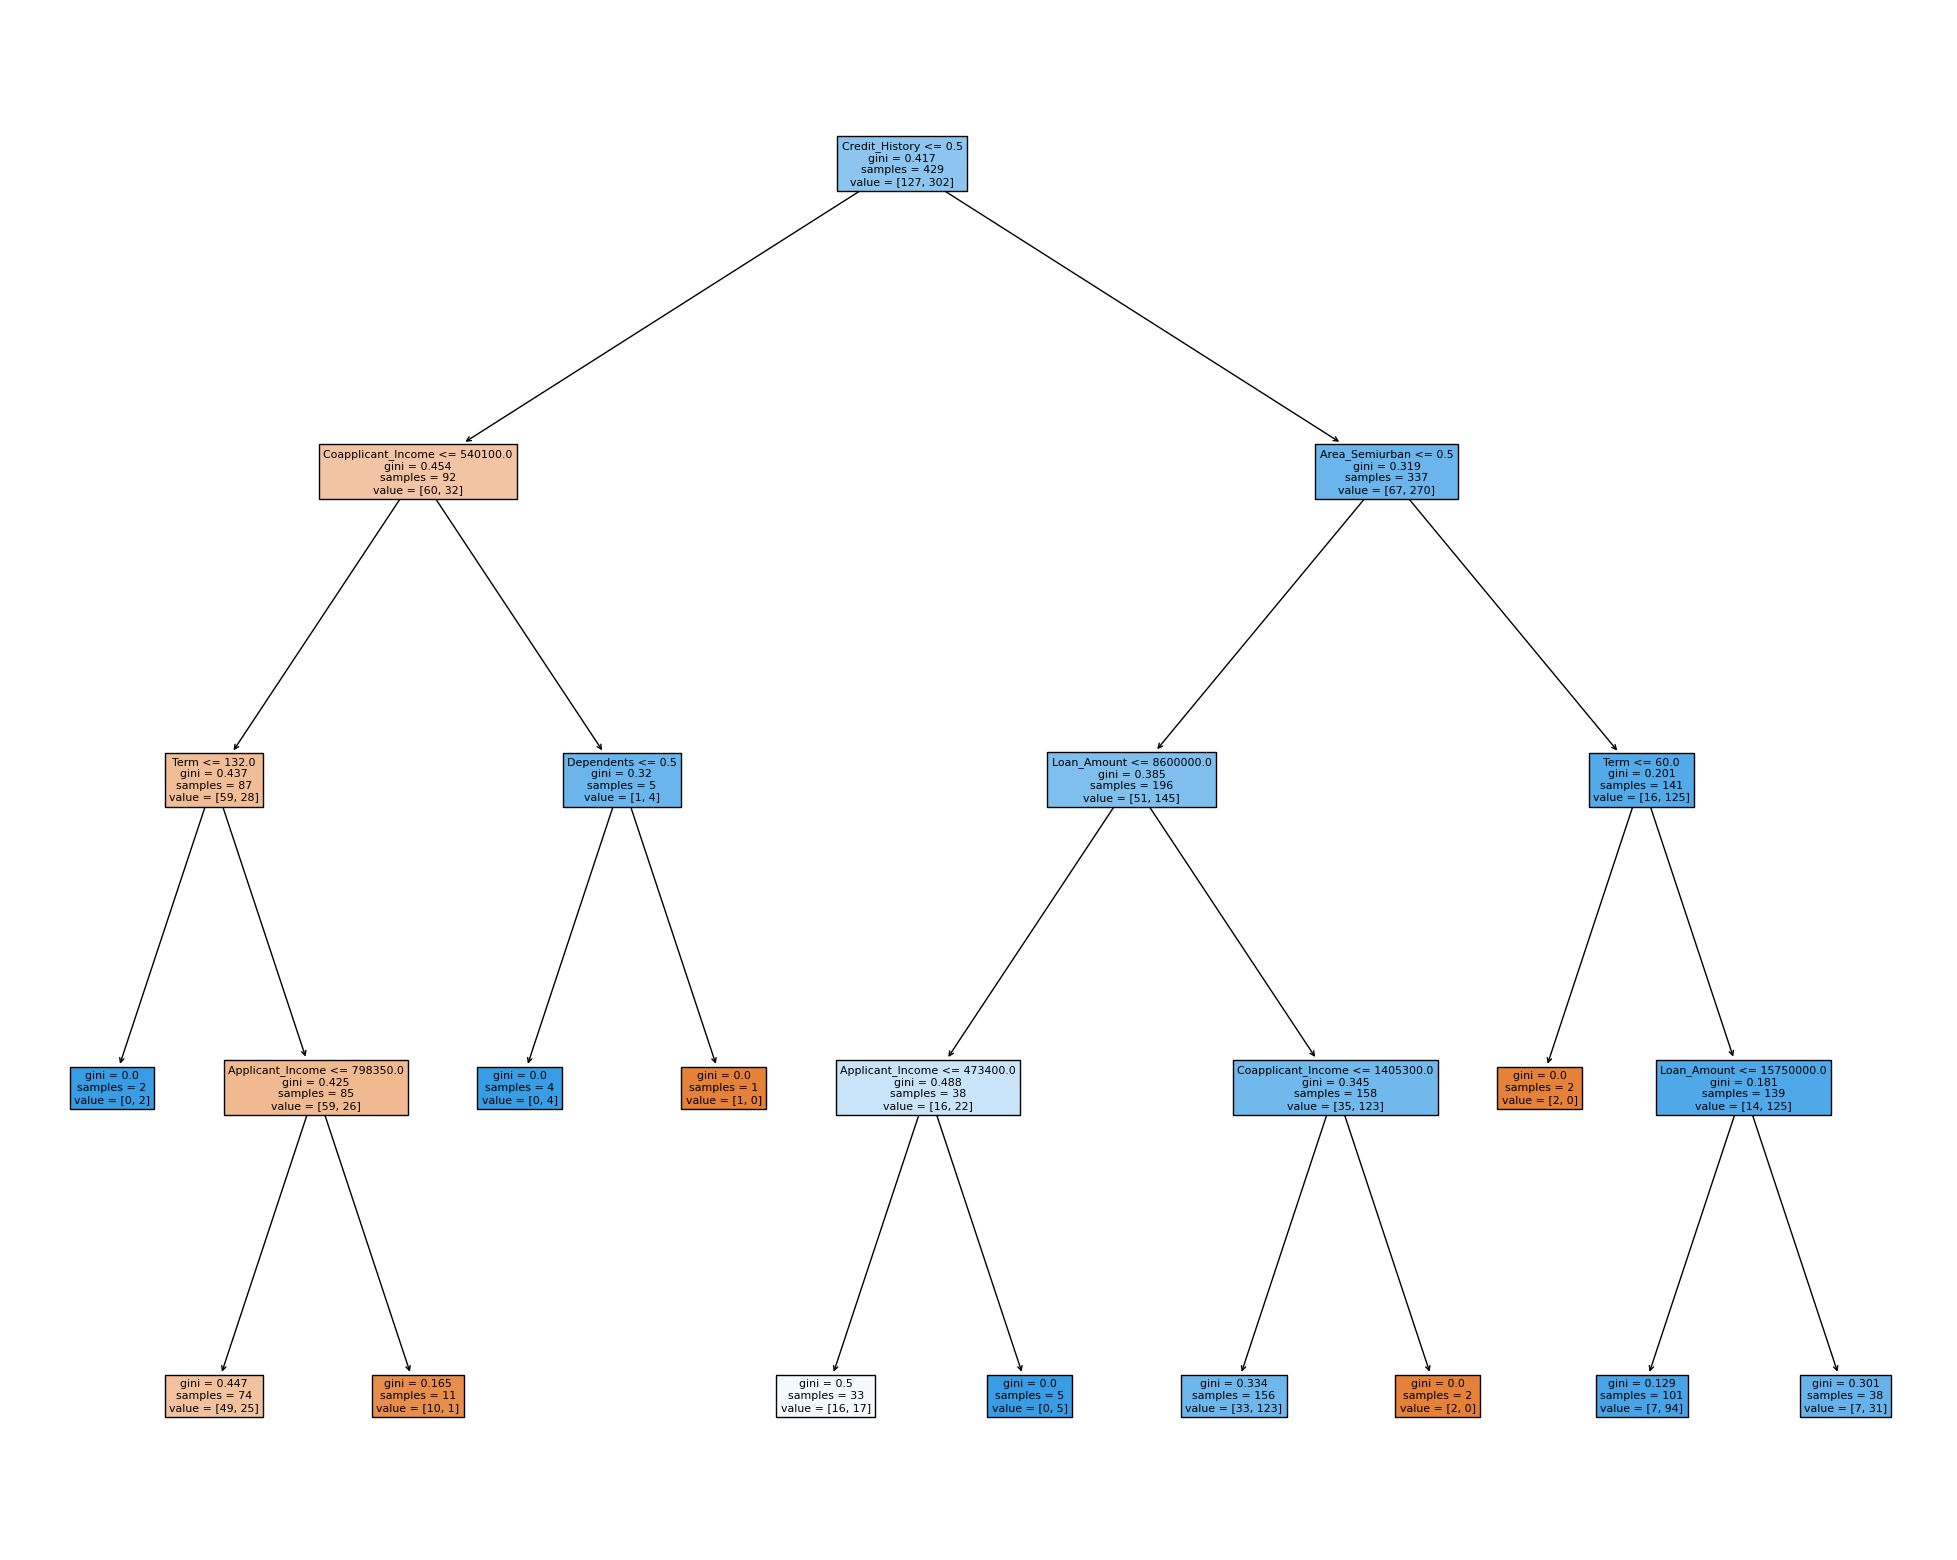

In [57]:
from sklearn.tree import plot_tree
fig= plt.figure(figsize=(25,20))
_ = plot_tree(dt,feature_names=validX.columns,filled=True)

According to the decision tree, the most important factor was the applicant's credit history, which accounts for 58% of the gini importance of the dataset. The next determining factor was the term of the loan, followed by co-applicant income. Gender, marital status, family size, education, self-employment, and, surprisingly, applicant income did not play a part in the decision to grant a loan.

## <center>Naive Bayes</center>

### Gausian Naive Bayes

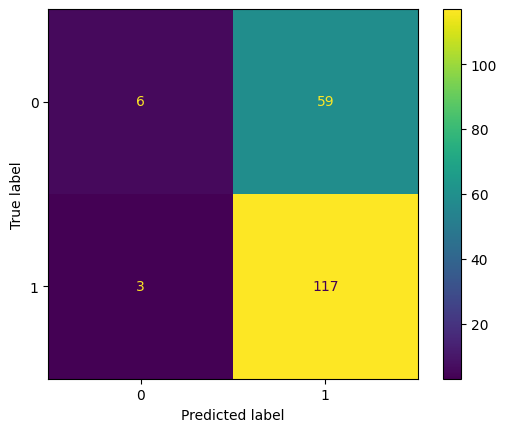

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(trainX,train_y)
gnb_v_pred = gnb.predict(validX)
cm_gnb= confusion_matrix(validy,gnb_v_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_gnb, display_labels=gnb.classes_).plot()

In [59]:
print("Accuracy:",accuracy_score(validy, gnb_v_pred))
print("precision score: ", precision_score(validy,gnb_v_pred))
print("recall score: ", recall_score(validy,gnb_v_pred))
print("f1-score: ", f1_score(validy,gnb_v_pred))

Accuracy: 0.6648648648648648
precision score:  0.6647727272727273
recall score:  0.975
f1-score:  0.7905405405405407


In [60]:
loan_T_gnb= loan_t.copy(deep=True)
gnb_tt_pred= gnb.predict(test_X)
loan_T_gnb['gnb_Status']= gnb_tt_pred
loan_T_gnb[loan_T_gnb['gnb_Status']==0]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area_Semiurban,Area_Urban,gnb_Status
18,1,1,0,1,0,922600,791600,30000000,360.0,1.0,False,True,0
25,1,0,0,1,0,0,2400000,14800000,360.0,0.0,False,False,0
81,1,1,4,1,0,7252900,0,36000000,360.0,1.0,False,True,0
85,1,1,2,1,0,463500,800000,10200000,180.0,1.0,False,False,0
123,1,0,0,1,0,250000,641400,18700000,360.0,0.0,False,False,0
143,1,1,0,1,1,3200000,0,55000000,360.0,0,True,False,0
230,1,0,0,1,0,1491100,1450700,13000000,360.0,1.0,True,False,0
237,1,1,2,0,0,616600,1398300,10200000,360.0,1.0,False,False,0
263,1,1,1,1,0,1884000,0,23400000,360.0,1.0,False,False,0
272,1,0,1,1,0,2479700,0,24000000,360.0,1.0,True,False,0


### Bernoulli Naive Bayes

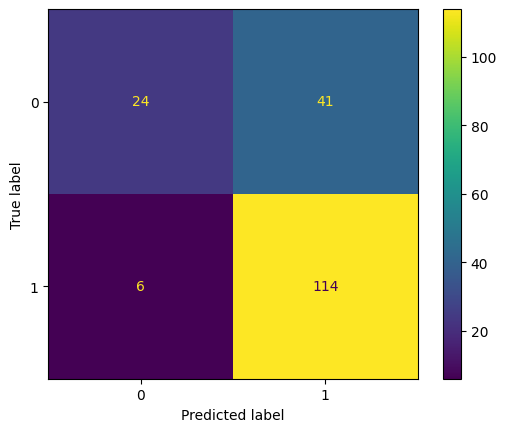

In [61]:
from sklearn.naive_bayes import BernoulliNB
bnb= BernoulliNB()
bnb.fit(trainX,train_y)
bnb_v_pred = bnb.predict(validX)
cm_v_bnb= confusion_matrix(validy,bnb_v_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_v_bnb, display_labels=bnb.classes_).plot()


In [62]:
print("Accuracy:",accuracy_score(validy, bnb_v_pred))
print("precision score: ", precision_score(validy,bnb_v_pred))
print("recall score: ", recall_score(validy,bnb_v_pred))
print("f1-score: ", f1_score(validy,bnb_v_pred))

Accuracy: 0.745945945945946
precision score:  0.7354838709677419
recall score:  0.95
f1-score:  0.829090909090909


In [63]:
loan_T_bnb= loan_t.copy(deep=True)
bnb_tt_pred= bnb.predict(test_X)
loan_T_bnb['bnb_Status']= bnb_tt_pred
loan_T_bnb[loan_T_bnb['bnb_Status']==0]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area_Semiurban,Area_Urban,bnb_Status
3,1,1,2,1,0,234000,254600,10000000,360.0,0,False,True,0
7,1,1,2,0,0,388100,0,14700000,360.0,0.0,False,False,0
12,1,0,4,1,0,416600,0,4000000,180.0,0,False,True,0
25,1,0,0,1,0,0,2400000,14800000,360.0,0.0,False,False,0
26,1,1,2,1,0,436300,125000,14000000,360.0,0,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0,0,0,1,0,433300,233300,16200000,360.0,0.0,False,False,0
346,1,1,0,1,0,339100,196600,13300000,360.0,0.0,False,False,0
351,1,0,0,1,0,228300,1500000,10600000,360.0,0,False,False,0
358,1,1,2,0,0,313200,0,7600000,360.0,0,False,False,0


### Complement Naive Bayes

Accuracy: 0.5621621621621622
precision score:  0.6466165413533834
recall score:  0.7166666666666667
f1-score:  0.6798418972332015


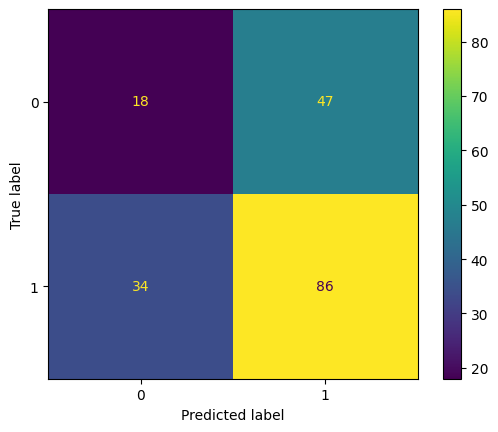

In [64]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(trainX,train_y)
cnb_v_pred = cnb.predict(validX)
cm_cnb= confusion_matrix(validy,cnb_v_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_cnb, display_labels=cnb.classes_).plot()
print("Accuracy:",accuracy_score(validy, cnb_v_pred))
print("precision score: ", precision_score(validy,cnb_v_pred))
print("recall score: ", recall_score(validy,cnb_v_pred))
print("f1-score: ", f1_score(validy,cnb_v_pred))

## <center>Neural Net</center>

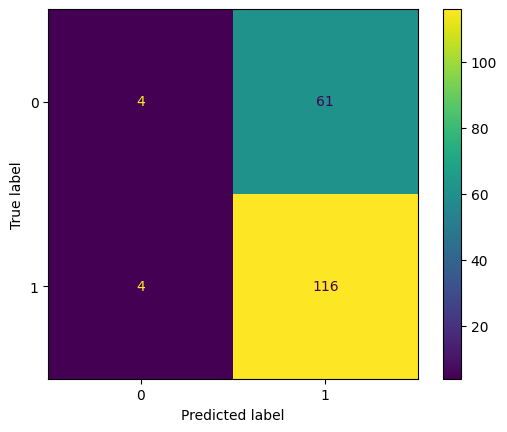

In [65]:
from sklearn.neural_network import MLPClassifier
nn= MLPClassifier()
nn.fit(trainX,train_y)
pred_nn= nn.predict(validX)
cm_nn= confusion_matrix(validy,pred_nn,labels=nn.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=nn.classes_).plot()
plt.show()

In [66]:
print("Accuracy:", round(accuracy_score(validy, pred_nn),4))
print("precision score: ", precision_score(validy,pred_nn))
print("recall score: ", recall_score(validy,pred_nn))
print("f1-score: ", f1_score(validy,pred_nn))


Accuracy: 0.6486
precision score:  0.655367231638418
recall score:  0.9666666666666667
f1-score:  0.7811447811447813


## <center>Grid Search for Logistic Regression, Decision Trees and Neural Nets</center>

## Cross Validation